In [1]:
import base64
import numpy as np
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import text_preprocessing
import extract_data



In [8]:
%load_ext autoreload
%autoreload 2
%aimport extract_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# extract data from news

Here we are extracting news data from Quartz Africa newspaper from weblink 'https://qz.com/africa/latest' . Reason behind to choose this website is its simplicity, you can easily extract the data with less effort of cleaning.

In [9]:
os.listdir('..//')

['code', 'data', 'output']

In [10]:
data_path = r'../data'
page_url='https://qz.com/africa/latest'
extract_data.extract_data(data_path,page_url)

In [11]:
train_df = pd.read_csv(os.path.join(data_path,'news.csv'))
print(train_df.info())
train_df = train_df.drop(['Unnamed: 0'],axis=1)
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
Unnamed: 0    5 non-null int64
Title         5 non-null object
Author        5 non-null object
PageLink      5 non-null object
Article       5 non-null object
Date          5 non-null object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes
None


,Title,Author,PageLink,Article,Date
0,An ambitious drone delivery health service in ...,Kwasi Gyamfi Asiedu,http://qz.com/africa/1604374/ziplines-drone-de...,The Ghana Health Service is working with Zipli...,2019-04-27 11:12:30.022229
1,MTN will list on the Nigerian Stock Exchange—b...,Yomi Kazeem,http://qz.com/africa/1603394/mtn-nigeria-ipo-t...,"But as Quartz Africa has reported, MTN began r...",2019-04-27 11:12:30.022229
2,How Nigerian universities can reverse their ye...,Isaac Adebayo Adeyemi,http://qz.com/africa/1603479/nigerian-universi...,In the last 40 years government funding in the...,2019-04-27 11:12:30.022229
3,The fossils of Africa’s ‘big lion’ were hidden...,Abdi Latif Dahir,http://qz.com/africa/1603323/big-lion-fossil-f...,"In 2010, Ohio University paleontologist Nancy ...",2019-04-27 11:12:30.022229
4,Scientists say we can’t be certain why Lake Ch...,"Frederi G. Viens, Michigan State University",http://qz.com/africa/1603258/scientists-arent-...,This second study had a geopolitical angle: if...,2019-04-27 11:12:30.022229


In [13]:
print(train_df.loc[0,'Title'],"\n")
print(train_df.loc[0,'Article'][:500])
train_df['article len'] = train_df['Article'].apply(lambda x:len(x))


An ambitious drone delivery health service in Ghana is tackling key logistics challenges 

The Ghana Health Service is working with Zipline, the drone company best known for starting blood delivery services in Rwanda. Ghana’s health policymakers hope faster drop-offs will improve its health outcomes including reducing its maternal and infant mortality rates. According to the World Health Organization, “severe bleeding during delivery or after childbirth is the commonest cause of maternal mortality and contributes to around 34% of maternal deaths in Africa.” The timely access to safe b


In [14]:
train_df.head(2)

,Title,Author,PageLink,Article,Date,article len
0,An ambitious drone delivery health service in ...,Kwasi Gyamfi Asiedu,http://qz.com/africa/1604374/ziplines-drone-de...,The Ghana Health Service is working with Zipli...,2019-04-27 11:12:30.022229,3307
1,MTN will list on the Nigerian Stock Exchange—b...,Yomi Kazeem,http://qz.com/africa/1603394/mtn-nigeria-ipo-t...,"But as Quartz Africa has reported, MTN began r...",2019-04-27 11:12:30.022229,1248


In [15]:
print('number of article in train data',len(train_df))


number of article in train data 5


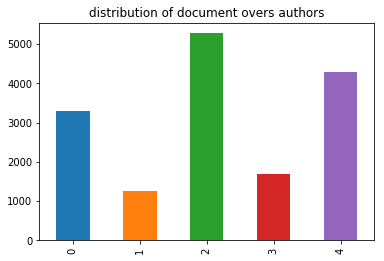

In [16]:
fig, ax = plt.subplots()
train_df['article len'].plot(ax=ax, kind='bar')
plt.title('distribution of document overs authors')
plt.show()

In [17]:
def vocab_distribution(all_words):
    aa = pd.DataFrame(all_words).reset_index()
    aa = aa.rename(columns= {'index': 'vocab',0:'freq'})
    aa.set_index('vocab',inplace = True)
    all_words = aa.sort_values(by='freq', ascending=False)
    print('top 10 words based on freq',all_words[:10])
    fig, ax = plt.subplots()
    all_words[:20].plot(ax=ax, kind='bar')
    plt.title('top 10 words distribution')
    plt.show()

top 10 words based on freq        freq
vocab      
the     123
to       84
of       74
and      73
in       55
is       37
a        35
The      21
that     19
for      19


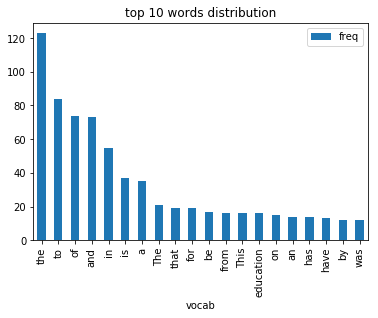

In [18]:
all_words = train_df['Article'].str.split(expand=True).unstack().value_counts()
len(all_words)
vocab_distribution(all_words)

all these words are part of speech, stop words. Not giving any idea of topic discussed in news article. So cleaning is required.

In [22]:
%load_ext autoreload
%autoreload 2
%aimport text_preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
train_df = text_preprocessing.text_preprocessing(train_df,'Article')
print(train_df.head())


                                               Title  \
0  An ambitious drone delivery health service in ...   
1  MTN will list on the Nigerian Stock Exchange—b...   
2  How Nigerian universities can reverse their ye...   
3  The fossils of Africa’s ‘big lion’ were hidden...   
4  Scientists say we can’t be certain why Lake Ch...   

                                        Author  \
0                          Kwasi Gyamfi Asiedu   
1                                  Yomi Kazeem   
2                        Isaac Adebayo Adeyemi   
3                             Abdi Latif Dahir   
4  Frederi G. Viens, Michigan State University   

                                            PageLink  \
0  http://qz.com/africa/1604374/ziplines-drone-de...   
1  http://qz.com/africa/1603394/mtn-nigeria-ipo-t...   
2  http://qz.com/africa/1603479/nigerian-universi...   
3  http://qz.com/africa/1603323/big-lion-fossil-f...   
4  http://qz.com/africa/1603258/scientists-arent-...   

                         

vocab size 902
top 10 words based on freq               freq
vocab             
education       21
lake            21
nigeria         17
institutions    14
also            11
chad            10
ghana           10
health          10
years            9
government       9


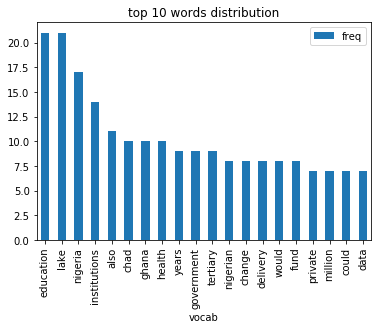

In [24]:
all_words = train_df['nltk_after_clean'].str.split(expand=True).unstack().value_counts()
print('vocab size',len(all_words) )
vocab_distribution(all_words)

now you can see the meaningful words in the documents. Now we will generate document-term matrix, we can use BOW, tf-idf methods for this purpose.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

def doc_word_matrix(text,bag_of_words,tf_idf):
    
    if bag_of_words:
        vectorizer = CountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
        ct = vectorizer.fit_transform(text)
    
    
    if tf_idf:
        vectorizer = TfidfVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
        ct = vectorizer.fit_transform(text)
        
    return ct, vectorizer

In [29]:
#document word BOW
text = list(train_df['nltk_after_clean'].values)
ct, vectorizer = doc_word_matrix(text,bag_of_words=False,tf_idf= True)

In [30]:
#extracting features
feature_names = vectorizer.get_feature_names()
count_vec = np.asarray(ct.sum(axis=0)).ravel()
print('vocab length',len(feature_names))
print('shape of BOW matrix',ct.shape)

print('distribution of vocab over documents',count_vec)


vocab length 101
shape of BOW matrix (5, 101)
distribution of vocab over documents [0.19325956 0.21060118 0.11944663 0.11944663 0.21520579 0.11944663
 0.13218375 0.75300442 0.32532763 0.34954695 0.13678825 0.2735765
 0.22630483 0.13678825 0.19325956 0.13678825 0.16121127 0.67651902
 0.45223097 0.13678825 0.50136126 0.13678825 0.24349775 0.13678825
 0.46397303 0.13678825 0.22794292 0.21155093 0.38112315 0.18147219
 0.65262809 0.62976671 0.11944663 0.22794292 0.24070003 0.57881516
 0.36378153 0.28901873 0.2106013  0.26802236 0.11944663 0.19786406
 0.19325956 0.32909806 0.34833918 0.13678825 0.47862366 0.20694644
 0.21155093 0.19881381 0.21190972 0.22794292 0.46917474 0.43742616
 0.33925692 0.30552332 0.8539699  0.56615625 0.20694644 0.13678825
 0.13678825 0.13678825 0.28536387 0.16121127 0.13678825 0.19786406
 0.25988962 0.33925692 0.11944663 0.11944663 0.13678825 0.13678825
 0.13678825 0.34367367 0.11944663 0.28901873 0.13218375 0.13678825
 0.36754888 0.3081017  0.18960482 0.13218375 0.

In [31]:
#top words
zipped = list(zip(feature_names, count_vec))
# print(zipped)
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# print(y)
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])
print(X,Y)

['nigeria' 'africa' 'change' 'ghana' 'years' 'government' 'health'
 'nigerian' 'company' 'like' 'million' 'delivery' 'climate' 'money'
 'university' 'uphill' 'according' 'scale' 'severe' 'trying' 'water'
 '2014' '2016' '30' 'governments' 'infrastructure' 'range' 'rates' 'road'
 'states'] [0.8539699  0.75300442 0.67651902 0.65262809 0.64688726 0.62976671
 0.57881516 0.56615625 0.50136126 0.47862366 0.46917474 0.46397303
 0.45223097 0.43742616 0.41630642 0.13678825 0.13218375 0.13218375
 0.13218375 0.13218375 0.13218375 0.11944663 0.11944663 0.11944663
 0.11944663 0.11944663 0.11944663 0.11944663 0.11944663 0.11944663]


# LSA 

# LSA is used to find hidden latent variable( topic ) in documents, it use SVD for that purpose.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

  
# raw documents to bag_of_words matrix:
vectorizer, small_document_term_matrix = ct, vectorizer = doc_word_matrix(text,bag_of_words=False,tf_idf= True)

# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=3,         # num dimensions
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(text)

In [34]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [35]:
lsa_keys = get_keys(svd_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [36]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    n_topics = 3
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [49]:
lsa_topic = []
top_n_words_lsa = get_top_n_words(10, lsa_keys, ct, vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    lsa_topic.append(top_n_words_lsa[i])

Topic 1:  nigeria ghana government health company africa delivery money nigerian sector
Topic 2:  change climate levels use work nigerian university students economic plan
Topic 3:  years like findings help africa ago massive quality great saw


these are  topics we have extracted from the documents using LSA , next we will see LDA to use it. LDA uses drichilit distribution.

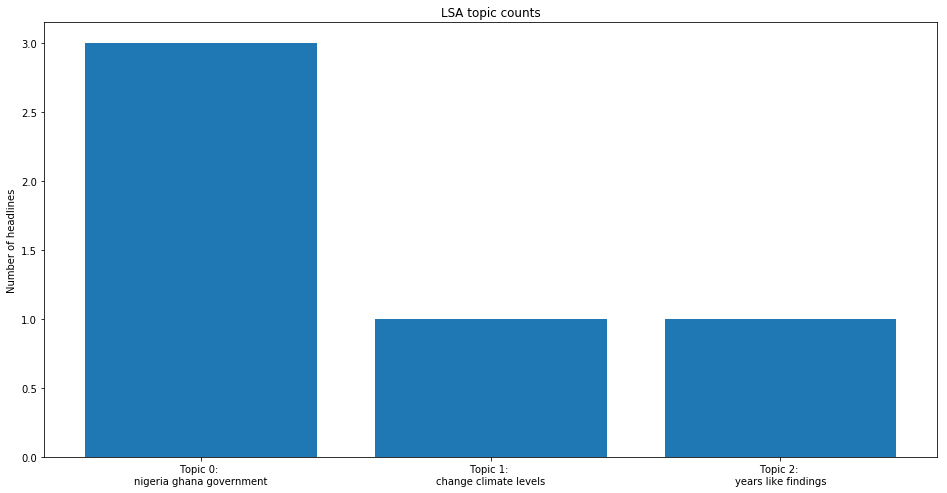

In [39]:
top_3_words = get_top_n_words(3, lsa_keys, ct, vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [40]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2500, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(svd_matrix)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.922340
[t-SNE] KL divergence after 650 iterations: 0.103415


t-SNE, or t-distributed stochastic neighbor embedding, is a dimensionality reduction algorithm for high-dimensional data visualization. This is partly to mitigate the fact that human cannot (at least not now) perceive vector space that is beyond 3-D.

In [41]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [42]:
n_topics  = 3
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [43]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [44]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, ct, vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA topic modelling

# LDA

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
ct,vectorizer = doc_word_matrix(text,bag_of_words=False,tf_idf = True)
print(ct.shape)
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(ct)


(5, 101)


In [51]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [52]:
lda_topic = []
top_n_words_lda = get_top_n_words(10, lda_keys, ct, vectorizer)

for i in range(len(top_n_words_lda)):
    lda_topic.append(top_n_words_lda[i])
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  change africa nigerian money climate nigeria plan company launch time
Topic 2:  nigeria years national quality sector government help like findings research
Topic 3:  health ghana delivery company like service million services including year


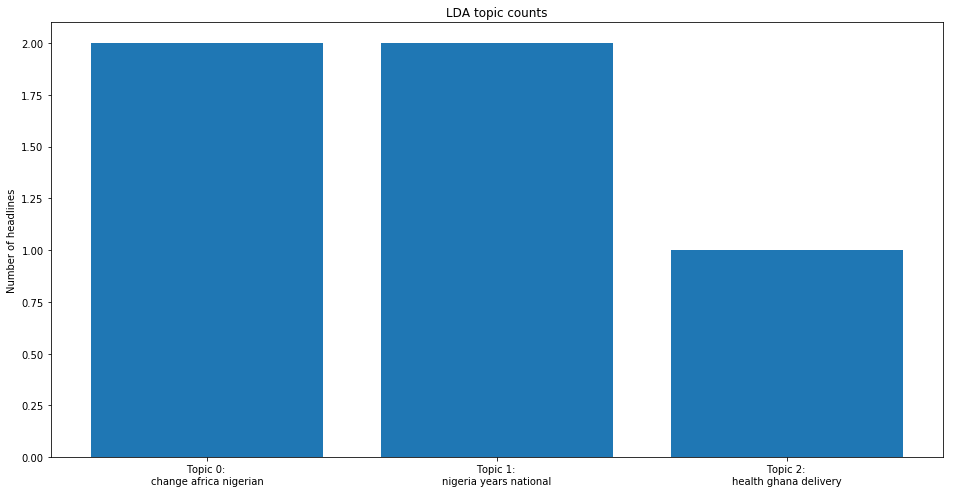

In [53]:
top_3_words = get_top_n_words(3, lda_keys, ct, vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [54]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2500, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.088444
[t-SNE] KL divergence after 1150 iterations: 0.100470


In [55]:
top_3_words_lda = get_top_n_words(3, lda_keys, ct, vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

lda is more promising in topic modeling. 

In [58]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [59]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda_model, feature_names, n_top_words)


Topics in LDA model: 

Topic #0:change africa nigerian money company climate plan launch nigeria time million use university government 100 work state began levels weekly 000 main profits saw service high small article public economic north ghana students largest relations particular innovation approach based local

Topic #1:nigeria years national quality sector help like ago findings government africa needs university research 2018 thousands used growth state including countries saw dramatic change using climate high african hope massive levels profits great creative working year article million money nigerian

Topic #2:ghana health delivery company like service sector including use million government help year time services small scale rates hope african working according range years began 30 make work founded people launch needs vice africa local road severe population infrastructure high


In [60]:
first_topic = lda_model.components_[0]
second_topic = lda_model.components_[1]
third_topic = lda_model.components_[2]
# fourth_topic = lda.components_[3]

In [61]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
# fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

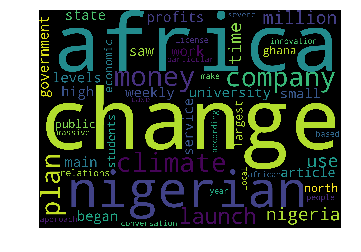

In [62]:
# from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

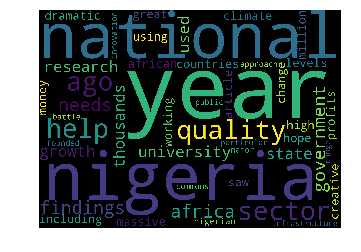

In [63]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

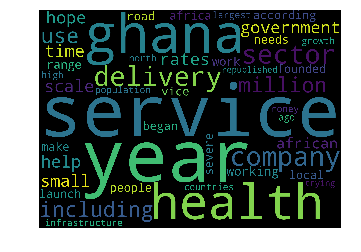

In [64]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Now we will see lda2vec which is basically a combination of word2vec and topic modeling.

# LDA2vec

In [66]:
%load_ext autoreload
%autoreload 2
from lda2vec.nlppipe import Preprocessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


for lda2vec, we will use '20_newsgroups.txt'

In [68]:
# Data directory
data_dir = r'../data'
# Where to save preprocessed data
clean_data_dir = os.path.join(data_dir,'clean_data')

In [69]:
input_file = "20_newsgroups.txt"
# Should we load pretrained embeddings from file
load_embeds = True

# Read in data file
df = pd.read_csv(data_dir+"/"+input_file, sep="\t")

In [70]:
len(df)
df = df[:2000]

In [71]:
len(df)

2000

In [72]:
df.texts
P = Preprocessor(df, "texts", max_features=30000, maxlen=10000, min_count=30)

In [73]:
P.preprocess()


---------- Tokenizing Texts ----------


2000it [00:28, 68.99it/s]


Removing 22547 low frequency tokens out of 23620 total tokens

---------- Getting Skipgrams ----------


2000it [00:02, 670.06it/s]


In [74]:
print('vocab size',P.vocab_size)

vocab size 1073


In [75]:
# dir(P)

In [76]:
def load_glove( EMBEDDING_FILE):
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE,encoding = 'utf8'))

    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    # word_index = tokenizer.word_index
    nb_words = P.vocab_size
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in P.word_to_idx.items():
        if i >= P.vocab_size: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: embedding_matrix[i] = embedding_vector

    return embedding_matrix 

In [79]:
load_embeds = True
if load_embeds:
    # Load embedding matrix from file path - change path to where you saved them
    embedding_matrix = load_glove(os.path.join(data_dir,"glove.6B.300d.txt"))
else:
    embedding_matrix = None

In [80]:
print('shape of embedding_matrix',embedding_matrix.shape)

shape of embedding_matrix (1073, 300)


In [81]:
# Save data to data_dir
P.save_data(clean_data_dir, embedding_matrix=embedding_matrix)

In [82]:
from lda2vec import utils, model

# Path to preprocessed data
data_path  = clean_data_dir
# Whether or not to load saved embeddings file
load_embeds = True

# Load data from files
(idx_to_word, word_to_idx, freqs, pivot_ids,
 target_ids, doc_ids, embed_matrix) = utils.load_preprocessed_data(data_path, load_embed_matrix=load_embeds)


In [83]:

# Number of unique documents
num_docs = doc_ids.max() + 1
# Number of unique words in vocabulary (int)
vocab_size = len(freqs)
# Embed layer dimension size
# If not loading embeds, change 128 to whatever size you want.
embed_size = embed_matrix.shape[1] if load_embeds else 128
# Number of topics to cluster into
num_topics = 10
# Amount of iterations over entire dataset
num_epochs = 200
# Batch size - Increase/decrease depending on memory usage
batch_size = 4096
# Epoch that we want to "switch on" LDA loss
switch_loss_epoch = 0
# Pretrained embeddings value
pretrained_embedding = embed_matrix if load_embeds else None
# If True, save logdir, otherwise don't
save_graph = True


In [84]:
# Initialize the model
m = model(num_docs,
          vocab_size,
          num_topics,
          embedding_size=embed_size,
          pretrained_embeddings=pretrained_embedding,
          freqs=freqs,
          batch_size = batch_size,
          save_graph_def=save_graph)



Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.


In [ ]:
# Train the model
m.train(pivot_ids,
        target_ids,
        doc_ids,
        len(pivot_ids),
        num_epochs,
        idx_to_word=idx_to_word,
        switch_loss_epoch=switch_loss_epoch)


EPOCH: 1
LOSS 52769.586 w2v 40.934616 lda 52728.652

EPOCH: 2
LOSS 50874.547 w2v 10.556454 lda 50863.992

EPOCH: 3
LOSS 49406.953 w2v 4.9731627 lda 49401.98

EPOCH: 4
LOSS 48264.195 w2v 6.7388525 lda 48257.457

EPOCH: 5
LOSS 47368.58 w2v 4.55978 lda 47364.02
Instructions for updating:
keep_dims is deprecated, use keepdims instead
---------Closest 10 words to given indexes----------
Topic 0 : unfortunately, example, addition, actually, fact, etc, instead, sort, supposed, thought
Topic 1 : unfortunately, example, addition, actually, etc, fact, instead, supposed, thought, sort
Topic 2 : unfortunately, example, addition, etc, fact, actually, instead, supposed, thought, sort
Topic 3 : unfortunately, example, addition, etc, fact, actually, instead, supposed, thought, sort
Topic 4 : unfortunately, example, addition, fact, actually, etc, instead, supposed, thought, sort
Topic 5 : unfortunately, example, addition, etc, fact, actually, instead, supposed, thought, sort
Topic 6 : unfortunately, e

lda2vec is used to train on large no.of epochs. 